In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%cd /content/gdrive/MyDrive/NLP2021/WordEmbeddings/

/content/gdrive/MyDrive/NLP2021/WordEmbeddings


In [3]:
#!wget http://nlp.stanford.edu/data/glove.6B.zip
#!unzip -q glove.6B.zip

In [4]:
!ls

 cbow.model			       'GloVe - MB Corpus.ipynb'
 cc.sa.300.vec.gz		        glove.model
 CoOcc-Test.ipynb		       'Glove - Pre-Trained Model.ipynb'
 fastText.mal.model		        mb
 fastText.mal.model.vectors.npy         MB_S
 FastText-MB.ipynb		        mb_vectors
'FastText-pretrained Malayalam.ipynb'   SanskritMB
'FastText - Sans.ipynb'		        skipgram.model
 glove100.model			        spacyWM.ipynb
 glove100.model.vectors.npy	        wiki.ml.vec.1
 glove50.model			        word2vecfromGoogle.model
 glove50.model.vectors.npy	       'Word2Vec - gensim - MB corpus.ipynb'
 glove.6B.50d.txt		       'Word2Vec - Pretrained.ipynb'
 glove.6B.50d.word2vec.txt


#Without Using Gensim
Raw code for handling GloVe vectors

* her 0.3339 -0.52136 ..... 0.62061
* percent 0.48716 0.95136 .... -0.83996
* than 0.10305 1.2472 .... 0.089829

In [5]:
import numpy as np

fn = "glove.6B.50d.txt"
g_file = open(fn)

In [6]:
model={}
for line in g_file:
    parts = line.split()
    word = parts[0]
    embedding = np.array([float(val) for val in parts[1:]])
    model[word] = embedding
#key-value
#the -0.44556 9.889898 ....

In [25]:
model['university']

array([-1.1082e+00,  1.2916e+00, -7.8751e-01, -4.5955e-01, -4.0788e-01,
       -5.3387e-01, -9.1468e-01, -4.8577e-01, -3.1858e-01, -3.3494e-01,
        5.0093e-01, -5.0392e-01,  2.9449e-02, -1.1748e+00, -4.7245e-01,
        2.7201e-01, -1.1093e-01,  1.0152e+00, -1.0427e+00,  1.4929e+00,
        7.0221e-01,  7.2141e-01, -1.0898e-01, -1.9169e-03, -7.6224e-02,
       -2.5398e+00,  1.2008e-01, -8.6093e-01, -2.1220e+00, -9.0913e-01,
        2.6149e+00, -4.9744e-02, -9.6555e-02, -2.2488e+00, -6.0325e-02,
        8.3282e-03, -1.0552e-01,  1.2435e+00,  1.7389e+00,  6.6512e-01,
       -1.1836e-01, -6.1496e-02, -2.9160e-01,  3.7698e-01, -9.7014e-02,
        4.8428e-01,  3.6570e-01,  2.6268e-01, -5.4315e-01,  3.5944e-02],
      dtype=float32)

In [8]:
## Write methods for similarity....

#Gensim - **KeyedVectors** - datastructure to organize word vectors.

models.keyedvectors : Module in gensim for handling word vectors.

**KeyedVectors** : Data structure for mapping between keys and vectors. **{str => 1D numpy array}**.




https://radimrehurek.com/gensim/models/keyedvectors.html


In [9]:
!pip install --upgrade gensim

     |████████████████████████████████| 24.1 MB 2.6 kB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [10]:
from gensim.models import KeyedVectors

#GloVe format vs Word2Vec format

GloVe format:

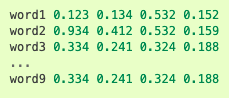


Word2Vec format:


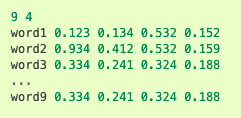





scripts.glove2word2vec – Convert glove format to word2vec

https://radimrehurek.com/gensim/scripts/glove2word2vec.html#gensim.scripts.glove2word2vec.glove2word2vec

In [11]:
from gensim.scripts.glove2word2vec import glove2word2vec

*This step can be done only once:*

convert glove format in the file **glove...txt** to -->

 word2vec format to some file say **word2vec...txt** using 

 **glove2word2vec()**

In [12]:
glove_file = 'glove.6B.50d.txt'
word2vec_glove_file = 'glove.6B.50d.word2vec.txt'
glove2word2vec(glove_file, word2vec_glove_file)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  This is separate from the ipykernel package so we can avoid doing imports until


(400000, 50)

Save the model to file - need to done initially

In [13]:
word2vec_glove_file = 'glove.6B.50d.word2vec.txt'
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)
model.save('glove50.model')

After model is saved you can load anytime

In [14]:
model = KeyedVectors.load('glove50.model')

In [16]:
model['key']

array([ 0.15912 ,  0.22512 ,  0.48318 ,  0.62752 ,  0.73202 , -0.15163 ,
       -0.31572 , -0.14877 ,  0.13651 ,  0.047836, -0.3496  , -0.10764 ,
       -0.74178 ,  0.4922  , -0.50442 ,  0.22205 ,  0.34967 , -0.88903 ,
        0.42555 , -0.26921 ,  0.31919 , -0.34001 , -0.33866 , -0.14304 ,
       -0.42091 , -1.3873  ,  0.34693 , -0.2115  , -0.041758,  0.36491 ,
        3.6069  , -0.072954, -0.11201 , -0.50525 ,  0.75177 ,  0.039188,
       -0.39388 ,  0.21477 , -0.47353 , -0.22379 , -0.44845 ,  0.24211 ,
       -0.10163 , -0.18937 ,  0.10739 ,  0.36207 ,  0.2075  ,  0.87523 ,
        0.35468 , -0.31814 ], dtype=float32)

#The methods in KeyedVectors

https://radimrehurek.com/gensim/models/keyedvectors.html

most_similar()
https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.most_similar



In [17]:
model.most_similar(positive=['woman', 'king'], negative=['man'])#woman+king-man

[('queen', 0.8523604273796082),
 ('throne', 0.7664334177970886),
 ('prince', 0.7592144012451172),
 ('daughter', 0.7473883628845215),
 ('elizabeth', 0.7460219860076904),
 ('princess', 0.7424570322036743),
 ('kingdom', 0.7337412238121033),
 ('monarch', 0.721449077129364),
 ('eldest', 0.7184861898422241),
 ('widow', 0.7099431157112122)]

In [27]:
model.most_similar('flower')

[('flowers', 0.8447046279907227),
 ('fruit', 0.7923508882522583),
 ('tree', 0.7542153000831604),
 ('fruits', 0.7288298010826111),
 ('garden', 0.7106596231460571),
 ('lavender', 0.7078107595443726),
 ('purple', 0.7065154314041138),
 ('ornaments', 0.7038702964782715),
 ('roses', 0.7011839747428894),
 ('fragrant', 0.6990464925765991)]

similarity()

In [19]:
model.similarity('school', 'university')

0.82615346

In [20]:
model.similar_by_word("india")

[('indian', 0.8648794293403625),
 ('pakistan', 0.8529723286628723),
 ('malaysia', 0.816650927066803),
 ('bangladesh', 0.8154239058494568),
 ('delhi', 0.8142766356468201),
 ('indonesia', 0.7939143776893616),
 ('thailand', 0.7864410281181335),
 ('sri', 0.7809486985206604),
 ('lanka', 0.7792481780052185),
 ('africa', 0.772837221622467)]

In [21]:
model.similar_by_key('india', topn=10)

[('indian', 0.8648794293403625),
 ('pakistan', 0.8529723286628723),
 ('malaysia', 0.816650927066803),
 ('bangladesh', 0.8154239058494568),
 ('delhi', 0.8142766356468201),
 ('indonesia', 0.7939143776893616),
 ('thailand', 0.7864410281181335),
 ('sri', 0.7809486985206604),
 ('lanka', 0.7792481780052185),
 ('africa', 0.772837221622467)]

In [22]:
vector = model['king']-model['queen']
model.similar_by_vector(vector)

[('abdulsalami', 0.6404846906661987),
 ('abdulsalam', 0.6071624159812927),
 ('dihg', 0.6034298539161682),
 ('sonthi', 0.5975116491317749),
 ('sani', 0.5938820838928223),
 ('zahir', 0.5915766358375549),
 ('umayyad', 0.5895776748657227),
 ('franks', 0.5887867212295532),
 ('murad', 0.5882194638252258),
 ('pervaiz', 0.5753746032714844)]

doesnt_match()

In [23]:
print(model.doesnt_match("university school teacher student lunch".split()))

lunch


distance()

In [24]:
w1='school'
w2='university'
model.distance(w1, w2)

0.1738465428352356

#t-SNE
t-distributed Stochastic Neighboring
Embedding. 

It’s a technique used for visualizing high-dimensional data
like embeddings by reducing them to two- or three-dimensional data

https://projector.tensorflow.org/

In [ ]:
from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling
import time
num_dimensions = 2  # final num dimensions (2D, 3D, etc)

# extract the words & their vectors, as numpy arrays

vectors = np.asarray(list(model.values()))
labels = np.asarray(list(model.keys()))  # fixed-width numpy strings
start = time.time()
# reduce using t-SNE
tsne = TSNE(n_components=num_dimensions, random_state=0)
vectors = tsne.fit_transform(vectors)

x_vals = [v[0] for v in vectors]
y_vals = [v[1] for v in vectors]

AttributeError: ignored

In [ ]:
def plot_with_matplotlib(x_vals, y_vals, labels,x,y,r):
    import matplotlib.pyplot as plt
    import random

    random.seed()

    plt.figure(figsize=(x, y))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 100 data points
    #
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, r)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

In [ ]:
plot_with_matplotlib(x_vals, y_vals, labels,200,200,1500)
end = time.time()
end-start